In [1]:
%matplotlib widget

# Generate Figures and Tables

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd

In [3]:
# Functions

def grid(model, depthmax=10):
    """ Generates a grid from the model to plot a 2D section"""
    # Arrays for plotting
    npos = np.shape(model)[0]
    ny = 71 # size of the grid in y direction
    y = np.linspace(0, depthmax, ny)
    grid = np.zeros((npos, ny))
    xx = np.linspace(0,npos+1,npos+1, endpoint=False)
    sig = model[:,:3].copy()
    thk = model[:,3:].copy()
    
    # Conductivities to be plotted in a grid
    for i in range(npos):
        y1 = 0
        while y[y1] <= thk[i,0]:
            grid[i, y1] = sig[i, 0]
            y1 += 1
            y2 = y1
        while y[y2] <= (thk[i,0] + thk[i,1]):
            grid[i, y2] = sig[i, 1]
            y2 += 1
        grid[i, y2:] = sig[i, 2]
        
    return grid

def rmse_a(p, o):
    """ Calculates the root mean squared error of an array
    p -> predicted
    o -> observed """
    error = np.sqrt(np.sum((p-o)**2))/len(p)
    return error

In [4]:
# Load models
model = np.load('data/model_synth_3Lay_B2.npy')

# Models estimated with global search
model_GS = np.load('results/model_3Lay_B2_GS.npy')
model_GS_Q = np.load('results/model_3Lay_B2_GS_Q.npy')
model_GS_IP = np.load('results/model_3Lay_B2_GS_IP.npy')

# Models estimated with gradient descent
model_opt = np.load('results/model_3Lay_B2_Opt.npy')
model_opt_Q = np.load('results/model_3Lay_B2_Opt_Q.npy')
model_opt_IP = np.load('results/model_3Lay_B2_Opt_IP.npy')
                        
# Models estimated with global search, data with added noise
model_GS_n2 = np.load('results/model_3Lay_B2_GS_n2.npy')
model_GS_n5 = np.load('results/model_3Lay_B2_GS_n5.npy')
model_GS_n10 = np.load('results/model_3Lay_B2_GS_n10.npy')

# Models estimated with gradient descent, data with added noise
model_opt_n2 = np.load('results/model_3Lay_B2_Opt_n2.npy')
model_opt_n5 = np.load('results/model_3Lay_B2_Opt_n5.npy')
model_opt_n10 = np.load('results/model_3Lay_B2_Opt_n10.npy')

# Model estimated using global search + optimization

model_GSplusOpt = np.load('results/model_3Lay_GSplusOpt_B2.npy')

In [5]:
# Create model grids (for plotting)
model_grd = grid(model)

model_GS_grd = grid(model_GS)
model_GS_Q_grd = grid(model_GS_Q)
model_GS_IP_grd = grid(model_GS_IP)

model_opt_grd = grid(model_opt)
model_opt_Q_grd = grid(model_opt_Q)
model_opt_IP_grd = grid(model_opt_IP)

model_GS_n2_grd = grid(model_GS_n2)
model_GS_n5_grd = grid(model_GS_n5)
model_GS_n10_grd = grid(model_GS_n10)

model_opt_n2_grd = grid(model_opt_n2)
model_opt_n5_grd = grid(model_opt_n5)
model_opt_n10_grd = grid(model_opt_n10)

model_GSplusOpt_grd = grid(model_GSplusOpt)

# Create error grids (for plotting)
error_GS = np.abs((model_grd-model_GS_grd)/model_grd)*100
error_GS_Q = np.abs((model_grd-model_GS_Q_grd)/model_grd)*100
error_GS_IP = np.abs((model_grd-model_GS_IP_grd)/model_grd)*100

error_GS_n2 = np.abs((model_grd-model_GS_n2_grd)/model_grd)*100
error_GS_n5 = np.abs((model_grd-model_GS_n5_grd)/model_grd)*100
error_GS_n10 = np.abs((model_grd-model_GS_n10_grd)/model_grd)*100

error_opt = np.abs((model_grd-model_opt_grd)/model_grd)*100
error_opt_Q = np.abs((model_grd-model_opt_Q_grd)/model_grd)*100
error_opt_IP = np.abs((model_grd-model_opt_IP_grd)/model_grd)*100

error_opt_n2 = np.abs((model_grd-model_opt_n2_grd)/model_grd)*100
error_opt_n5 = np.abs((model_grd-model_opt_n5_grd)/model_grd)*100
error_opt_n10 = np.abs((model_grd-model_opt_n10_grd)/model_grd)*100

error_GSplusOpt = np.abs((model_grd - model_GSplusOpt_grd)/model_grd)*100

## Figure 1

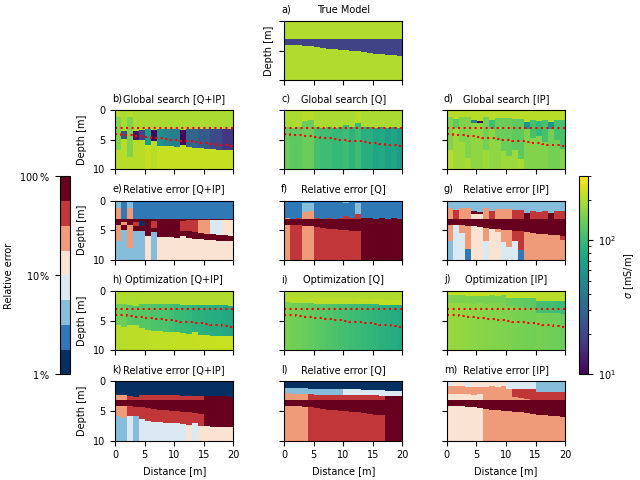

In [6]:
fig, ax = plt.subplots(5,3, sharex=True, sharey=True, layout='constrained')

depth_true1 = model[:,3].copy()
depth_true2 = model[:,3] + model[:,4]
vmin=10
vmax=300
cmap='viridis'
interp='none'
npos = len(model)
ext=[0,npos,10,0]
norm= colors.LogNorm(vmin=vmin, vmax=vmax)
fs=7 # fontsize

xx = np.linspace(0,npos+1,npos+1, endpoint=False)
ax[1,0].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')
ax[1,1].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')
ax[1,2].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')

ax[3,0].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')
ax[3,1].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')
ax[3,2].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')

ax[1,0].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')
ax[1,1].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')
ax[1,2].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')

ax[3,0].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')
ax[3,1].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')
ax[3,2].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')

ax[0,0].remove()
ax[0,2].remove()
mod = ax[0,1].imshow((model_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[0,1].set_title('True Model', fontsize=fs)
ax[0,1].set_ylabel('Depth [m]', fontsize=fs)
ax[0,1].tick_params(labelsize=fs)
ax[0,1].text(-0.5,-1.5,'a)', color='k',fontsize=fs)

ax[1,0].imshow((model_GS_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[1,0].set_title('Global search [Q+IP]', fontsize=fs)
ax[1,0].set_ylabel('Depth [m]', fontsize=fs)
ax[1,0].tick_params(labelsize=fs)
ax[1,0].text(-0.5,-1.5,'b)', color='k',fontsize=fs)

ax[1,1].imshow((model_GS_Q_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[1,1].set_title('Global search [Q]', fontsize=fs)
ax[1,1].text(-0.5,-1.5,'c)', color='k',fontsize=fs)

ax[1,2].imshow((model_GS_IP_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[1,2].set_title('Global search [IP]', fontsize=fs)
ax[1,2].text(-0.5,-1.5,'d)', color='k',fontsize=fs)

err = ax[2,0].imshow(np.log10(error_GS).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[2,0].set_title('Relative error [Q+IP]', fontsize=fs)
ax[2,0].set_ylabel('Depth [m]', fontsize=fs)
ax[2,0].tick_params(labelsize=fs)
ax[2,0].text(-0.5,-1.5,'e)', color='k',fontsize=fs)

ax[2,1].imshow(np.log10(error_GS_Q).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[2,1].set_title('Relative error [Q]', fontsize=fs)
ax[2,1].text(-0.5,-1.5,'f)', color='k',fontsize=fs)

ax[2,2].imshow(np.log10(error_GS_IP).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[2,2].set_title('Relative error [IP]', fontsize=fs)
ax[2,2].text(-0.5,-1.5,'g)', color='k',fontsize=fs)

ax[3,0].imshow((model_opt_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[3,0].set_title('Optimization [Q+IP]', fontsize=fs)
ax[3,0].set_ylabel('Depth [m]', fontsize=fs)
ax[3,0].tick_params(labelsize=fs)
ax[3,0].text(-0.5,-1.5,'h)', color='k',fontsize=fs)

ax[3,1].imshow((model_opt_Q_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[3,1].set_title('Optimization [Q]', fontsize=fs)
ax[3,1].text(-0.5,-1.5,'i)', color='k',fontsize=fs)

ax[3,2].imshow((model_opt_IP_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[3,2].set_title('Optimization [IP]', fontsize=fs)
ax[3,2].text(-0.5,-1.5,'j)', color='k',fontsize=fs)

ax[4,0].imshow(np.log10(error_opt).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[4,0].set_title('Relative error [Q+IP]', fontsize=fs)
ax[4,0].set_ylabel('Depth [m]', fontsize=fs)
ax[4,0].set_xlabel('Distance [m]', fontsize=fs)
ax[4,0].tick_params(labelsize=fs)
ax[4,0].text(-0.5,-1.5,'k)', color='k',fontsize=fs)

ax[4,1].imshow(np.log10(error_opt_Q).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[4,1].set_title('Relative error [Q]', fontsize=fs)
ax[4,1].set_xlabel('Distance [m]', fontsize=fs)
ax[4,1].tick_params(labelsize=fs)
ax[4,1].text(-0.5,-1.5,'l)', color='k',fontsize=fs)

ax[4,2].imshow(np.log10(error_opt_IP).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[4,2].set_title('Relative error [IP]', fontsize=fs)
ax[4,2].set_xlabel('Distance [m]', fontsize=fs)
ax[4,2].tick_params(labelsize=fs)
ax[4,2].text(-0.5,-1.5,'m)', color='k',fontsize=fs)

clb_mod = fig.colorbar(mod, ax=ax[1:,2], location='right', shrink=0.6)
clb_mod.ax.tick_params(labelsize=fs)
clb_mod.set_label('$\sigma$ [mS/m]', fontsize=fs )

clb_err = fig.colorbar(err, ax=ax[1:,0], location='left', shrink=0.6)
clb_err.ax.tick_params(labelsize=fs)
clb_err.set_label('Relative error', fontsize=fs )
clb_err.set_ticks([ 0, 1, 2])
clb_err.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])
plt.savefig('figures/3Lay_B2_GSvsOpt.eps', format='eps')

## Figure 2

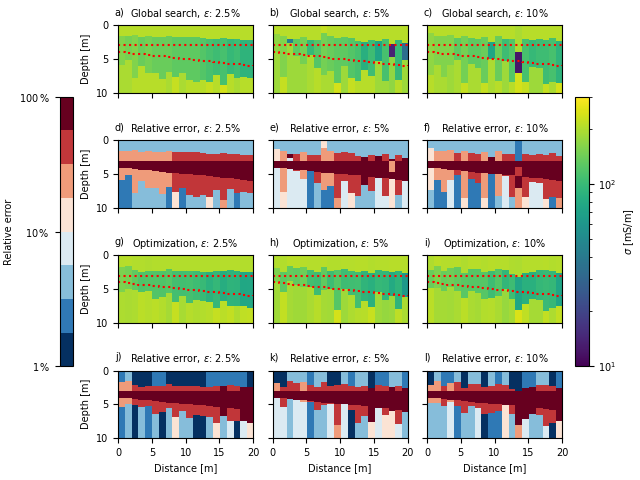

In [7]:
fig, ax = plt.subplots(4,3, sharex=True, sharey=True, layout='constrained')

ax[0,0].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')
ax[0,1].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')
ax[0,2].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')

ax[2,0].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')
ax[2,1].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')
ax[2,2].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')

ax[0,0].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')
ax[0,1].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')
ax[0,2].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')

ax[2,0].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')
ax[2,1].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')
ax[2,2].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')


ax[0,0].imshow((model_GS_n2_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[0,0].set_title('Global search, $\epsilon$: 2.5%', fontsize=fs)
ax[0,0].set_ylabel('Depth [m]', fontsize=fs)
ax[0,0].tick_params(labelsize=fs)
ax[0,0].text(-0.5,-1.5,'a)', color='k',fontsize=fs)

ax[0,1].imshow((model_GS_n5_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[0,1].set_title('Global search, $\epsilon$: 5%', fontsize=fs)
ax[0,1].text(-0.5,-1.5,'b)', color='k',fontsize=fs)

ax[0,2].imshow((model_GS_n10_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[0,2].set_title('Global search, $\epsilon$: 10%', fontsize=fs)
ax[0,2].text(-0.5,-1.5,'c)', color='k',fontsize=fs)

ax[1,0].imshow(np.log10(error_GS_n2).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[1,0].set_title('Relative error, $\epsilon$: 2.5%', fontsize=fs)
ax[1,0].set_ylabel('Depth [m]', fontsize=fs)
ax[1,0].tick_params(labelsize=fs)
ax[1,0].text(-0.5,-1.5,'d)', color='k',fontsize=fs)

ax[1,1].imshow(np.log10(error_GS_n5).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[1,1].set_title('Relative error, $\epsilon$: 5%', fontsize=fs)
ax[1,1].text(-0.5,-1.5,'e)', color='k',fontsize=fs)

ax[1,2].imshow(np.log10(error_GS_n10).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[1,2].set_title('Relative error, $\epsilon$: 10%', fontsize=fs)
ax[1,2].text(-0.5,-1.5,'f)', color='k',fontsize=fs)

ax[2,0].imshow((model_opt_n2_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[2,0].set_title('Optimization, $\epsilon$: 2.5%', fontsize=fs)
ax[2,0].set_ylabel('Depth [m]', fontsize=fs)
ax[2,0].tick_params(labelsize=fs)
ax[2,0].text(-0.5,-1.5,'g)', color='k',fontsize=fs)

ax[2,1].imshow((model_opt_n5_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[2,1].set_title('Optimization, $\epsilon$: 5%', fontsize=fs)
ax[2,1].text(-0.5,-1.5,'h)', color='k',fontsize=fs)

mod = ax[2,2].imshow((model_opt_n10_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[2,2].set_title('Optimization, $\epsilon$: 10%', fontsize=fs)
ax[2,2].text(-0.5,-1.5,'i)', color='k',fontsize=fs)

ax[3,0].imshow(np.log10(error_opt_n2).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[3,0].set_title('Relative error, $\epsilon$: 2.5%', fontsize=fs)
ax[3,0].set_ylabel('Depth [m]', fontsize=fs)
ax[3,0].set_xlabel('Distance [m]', fontsize=fs)
ax[3,0].tick_params(labelsize=fs)
ax[3,0].text(-0.5,-1.5,'j)', color='k',fontsize=fs)

ax[3,1].imshow(np.log10(error_opt_n5).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[3,1].set_title('Relative error, $\epsilon$: 5%', fontsize=fs)
ax[3,1].set_xlabel('Distance [m]', fontsize=fs)
ax[3,1].tick_params(labelsize=fs)
ax[3,1].text(-0.5,-1.5,'k)', color='k',fontsize=fs)

err = ax[3,2].imshow(np.log10(error_opt_n10).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[3,2].set_title('Relative error, $\epsilon$: 10%', fontsize=fs)
ax[3,2].set_xlabel('Distance [m]', fontsize=fs)
ax[3,2].tick_params(labelsize=fs)
ax[3,2].text(-0.5,-1.5,'l)', color='k',fontsize=fs)

clb_mod = fig.colorbar(mod, ax=ax[:,2], location='right', shrink=0.6)
clb_mod.ax.tick_params(labelsize=fs)
clb_mod.set_label('$\sigma$ [mS/m]', fontsize=fs )

clb_err = fig.colorbar(err, ax=ax[:,0], location='left', shrink=0.6)
clb_err.ax.tick_params(labelsize=fs)
clb_err.set_label('Relative error', fontsize=fs )
clb_err.set_ticks([ 0, 1, 2])
clb_err.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])

plt.savefig('figures/3Lay_B2_GSvsOpt_noise.eps', format='eps')

## Figure 3

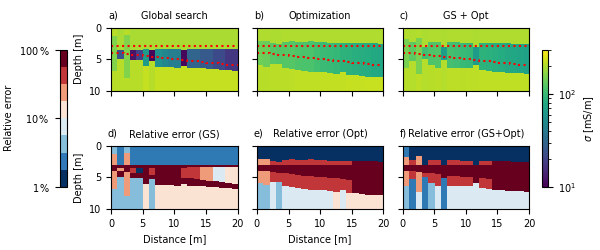

In [8]:
fig, ax = plt.subplots(2,3, sharex=True, sharey=True, layout='constrained', 
                       figsize=(6,2.5))

depth_true1 = model[:,3].copy()
depth_true2 = model[:,3] + model[:,4]
vmin=10
vmax=300
cmap='viridis'
interp='none'
npos = len(model)
ext=[0,npos,10,0]
norm= colors.LogNorm(vmin=vmin, vmax=vmax)
fs=7 # fontsize

xx = np.linspace(0,npos+1,npos+1, endpoint=False)
ax[0,0].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')
ax[0,1].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')
ax[0,2].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true1[0],depth_true1[:], depth_true1[-2])), ':r')

ax[0,0].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')
ax[0,1].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')
ax[0,2].step(np.hstack((xx, xx[-1])), 
         np.hstack((depth_true2[0],depth_true2[:], depth_true2[-2])), ':r')

ax[0,0].imshow((model_GS_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[0,0].set_title('Global search', fontsize=fs)
ax[0,0].set_ylabel('Depth [m]', fontsize=fs)
ax[0,0].tick_params(labelsize=fs)
ax[0,0].text(-0.5,-1.5,'a)', color='k',fontsize=fs)

ax[0,1].imshow((model_opt_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[0,1].set_title('Optimization', fontsize=fs)
ax[0,1].tick_params(labelsize=fs)
ax[0,1].text(-0.5,-1.5,'b)', color='k',fontsize=fs)

ax[0,2].imshow((model_GSplusOpt_grd*1000).T, cmap=cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[0,2].set_title('GS + Opt', fontsize=fs)
ax[0,2].tick_params(labelsize=fs)
ax[0,2].text(-0.5,-1.5,'c)', color='k',fontsize=fs)

err = ax[1,0].imshow(np.log10(error_GS).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[1,0].set_title('Relative error (GS)', fontsize=fs)
ax[1,0].set_ylabel('Depth [m]', fontsize=fs)
ax[1,0].tick_params(labelsize=fs)
ax[1,0].text(-0.5,-1.5,'d)', color='k',fontsize=fs)
ax[1,0].set_xlabel('Distance [m]', fontsize=fs)

ax[1,1].imshow(np.log10(error_opt).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[1,1].set_title('Relative error (Opt)', fontsize=fs)
ax[1,1].tick_params(labelsize=fs)
ax[1,1].text(-0.5,-1.5,'e)', color='k',fontsize=fs)
ax[1,1].set_xlabel('Distance [m]', fontsize=fs)

ax[1,2].imshow(np.log10(error_GSplusOpt).T, vmin=0, vmax=2, extent=ext, interpolation=interp,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
ax[1,2].set_title('Relative error (GS+Opt)', fontsize=fs)
ax[1,2].tick_params(labelsize=fs)
ax[1,2].text(-0.5,-1.5,'f)', color='k',fontsize=fs)
ax[1,1].set_xlabel('Distance [m]', fontsize=fs)

clb_mod = fig.colorbar(mod, ax=ax[0:,2], location='right', shrink=0.6)
clb_mod.ax.tick_params(labelsize=fs)
clb_mod.set_label('$\sigma$ [mS/m]', fontsize=fs )

clb_err = fig.colorbar(err, ax=ax[0:,0], location='left', shrink=0.6)
clb_err.ax.tick_params(labelsize=fs)
clb_err.set_label('Relative error', fontsize=fs )
clb_err.set_ticks([ 0, 1, 2])
clb_err.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])
plt.savefig('figures/3Lay_B2_GSplusOpt.eps', format='eps')

## RMSE tables

In [9]:
RMSE_s_GS = rmse_a(np.hstack(model[:,:3]), np.hstack(model_GS[:,:3]))*1000
RMSE_h_GS = rmse_a(np.hstack(model[:,3:]), np.hstack(model_GS[:,3:]))

RMSE_s_GS_Q = rmse_a(np.hstack(model[:,:3]), np.hstack(model_GS_Q[:,:3]))*1000
RMSE_h_GS_Q = rmse_a(np.hstack(model[:,3:]), np.hstack(model_GS_Q[:,3:]))

RMSE_s_GS_IP = rmse_a(np.hstack(model[:,:3]), np.hstack(model_GS_IP[:,:3]))*1000
RMSE_h_GS_IP = rmse_a(np.hstack(model[:,3:]), np.hstack(model_GS_IP[:,3:]))

RMSE_s_Opt = rmse_a(np.hstack(model[:,:3]), np.hstack(model_opt[:,:3]))*1000
RMSE_h_Opt = rmse_a(np.hstack(model[:,3:]), np.hstack(model_opt[:,3:]))

RMSE_s_Opt_Q = rmse_a(np.hstack(model[:,:3]), np.hstack(model_opt_Q[:,:3]))*1000
RMSE_h_Opt_Q = rmse_a(np.hstack(model[:,3:]), np.hstack(model_opt_Q[:,3:]))

RMSE_s_Opt_IP = rmse_a(np.hstack(model[:,:3]), np.hstack(model_opt_IP[:,:3]))*1000
RMSE_h_Opt_IP = rmse_a(np.hstack(model[:,3:]), np.hstack(model_opt_IP[:,3:]))

In [10]:
Error_List_Method = [['Global search [Q+IP]', RMSE_s_GS, RMSE_h_GS],
              ['Global search [Q]', RMSE_s_GS_Q, RMSE_h_GS_Q],
              ['Global search [IP]', RMSE_s_GS_IP, RMSE_h_GS_IP],
              ['Optimization [Q+IP]', RMSE_s_Opt, RMSE_h_Opt],
              ['Optimization [Q]', RMSE_s_Opt_Q, RMSE_h_Opt_Q],
              ['Optimization [IP]', RMSE_s_Opt_IP, RMSE_h_Opt_IP]]

In [11]:
pd.DataFrame(Error_List_Method, columns=['Method', 'RMSE $\sigma$ [mS/m]', 'RMSE $h$ [m]'])


,Method,RMSE $\sigma$ [mS/m],RMSE $h$ [m]
0,Global search [Q+IP],3.842397,0.212791
1,Global search [Q],15.252665,0.323824
2,Global search [IP],7.884772,0.347505
3,Optimization [Q+IP],6.661907,0.291915
4,Optimization [Q],15.843291,0.232440
5,Optimization [IP],9.443367,0.217047


In [12]:
RMSE_s_GS_n2 = rmse_a(np.hstack(model[:,:3]), np.hstack(model_GS_n2[:,:3]))*1000
RMSE_h_GS_n2 = rmse_a(np.hstack(model[:,3:]), np.hstack(model_GS_n2[:,3:]))

RMSE_s_GS_n5 = rmse_a(np.hstack(model[:,:3]), np.hstack(model_GS_n5[:,:3]))*1000
RMSE_h_GS_n5 = rmse_a(np.hstack(model[:,3:]), np.hstack(model_GS_n5[:,3:]))

RMSE_s_GS_n10 = rmse_a(np.hstack(model[:,:3]), np.hstack(model_GS_n10[:,:3]))*1000
RMSE_h_GS_n10 = rmse_a(np.hstack(model[:,3:]), np.hstack(model_GS_n10[:,3:]))

RMSE_s_Opt_n2 = rmse_a(np.hstack(model[:,:3]), np.hstack(model_opt_n2[:,:3]))*1000
RMSE_h_Opt_n2 = rmse_a(np.hstack(model[:,3:]), np.hstack(model_opt_n2[:,3:]))

RMSE_s_Opt_n5 = rmse_a(np.hstack(model[:,:3]), np.hstack(model_opt_n5[:,:3]))*1000
RMSE_h_Opt_n5 = rmse_a(np.hstack(model[:,3:]), np.hstack(model_opt_n5[:,3:]))

RMSE_s_Opt_n10 = rmse_a(np.hstack(model[:,:3]), np.hstack(model_opt_n10[:,:3]))*1000
RMSE_h_Opt_n10 = rmse_a(np.hstack(model[:,3:]), np.hstack(model_opt_n10[:,3:]))

In [13]:
Error_List_Noise = [['Global search [Q+IP], $\epsilon$: 2.5%', RMSE_s_GS_n2, RMSE_h_GS_n2],
              ['Global search [Q+IP], $\epsilon$: 5%', RMSE_s_GS_n5, RMSE_h_GS_n5],
              ['Global search [Q+IP], $\epsilon$: 10%', RMSE_s_GS_n10, RMSE_h_GS_n10],
              ['Optimization [Q+IP], $\epsilon$: 2.5%', RMSE_s_Opt_n2, RMSE_h_Opt_n2],
              ['Optimization [Q+IP], $\epsilon$: 5%', RMSE_s_Opt_n5, RMSE_h_Opt_n5],
              ['Optimization [Q+IP], $\epsilon$: 10%', RMSE_s_Opt_n10, RMSE_h_Opt_n10]]

In [14]:
pd.DataFrame(Error_List_Noise, columns=['Method', 'RMSE $\sigma$ [mS/m]', 'RMSE $h$ [m]'])

,Method,RMSE $\sigma$ [mS/m],RMSE $h$ [m]
0,"Global search [Q+IP], $\epsilon$: 2.5%",8.116734,0.435817
1,"Global search [Q+IP], $\epsilon$: 5%",7.395491,0.344065
2,"Global search [Q+IP], $\epsilon$: 10%",8.012738,0.408498
3,"Optimization [Q+IP], $\epsilon$: 2.5%",6.796525,0.259826
4,"Optimization [Q+IP], $\epsilon$: 5%",6.980518,0.222424
5,"Optimization [Q+IP], $\epsilon$: 10%",7.153839,0.237290


In [15]:
RMSE_s_GS = rmse_a(np.hstack(model[:,:3]), np.hstack(model_GS[:,:3]))*1000
RMSE_h_GS = rmse_a(np.hstack(model[:,3:]), np.hstack(model_GS[:,3:]))

RMSE_s_Opt = rmse_a(np.hstack(model[:,:3]), np.hstack(model_opt[:,:3]))*1000
RMSE_h_Opt = rmse_a(np.hstack(model[:,3:]), np.hstack(model_opt[:,3:]))

RMSE_s_GSplusOpt = rmse_a(np.hstack(model[:,:3]), np.hstack(model_GSplusOpt[:,:3]))*1000
RMSE_h_GSplusOpt = rmse_a(np.hstack(model[:,3:]), np.hstack(model_GSplusOpt[:,3:]))

In [16]:
Error_List_Method = [['Global search', RMSE_s_GS, RMSE_h_GS],
              ['Optimization', RMSE_s_Opt, RMSE_h_Opt],
              ['GS + Opt', RMSE_s_GSplusOpt, RMSE_h_GSplusOpt]]

In [17]:
pd.DataFrame(Error_List_Method, columns=['Method', 'RMSE $\sigma$ [mS/m]', 'RMSE $h$ [m]'])

,Method,RMSE $\sigma$ [mS/m],RMSE $h$ [m]
0,Global search,3.842397,0.212791
1,Optimization,6.661907,0.291915
2,GS + Opt,6.182351,0.258261
